## Problem Statement:
Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can
accurately classify these images into the correct fashion categories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


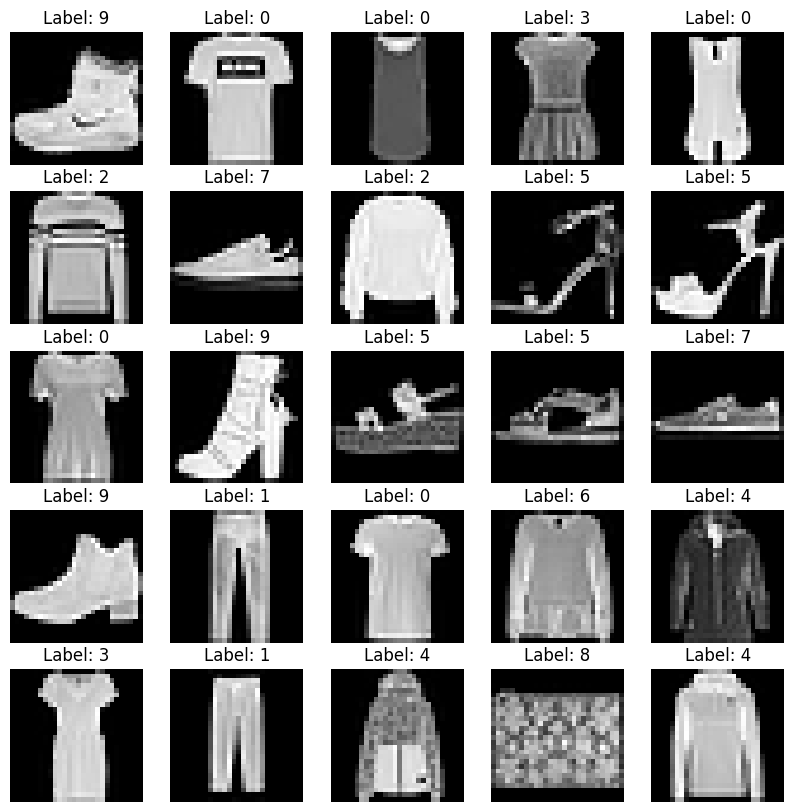

In [2]:
# Step 1: Data Visualization and Preprocessing

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Visualize the distribution of different fashion items in the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [3]:
# Normalize the image pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert categorical labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Step 2: Model Architecture and Development

# Design a fully connected neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Step 3: Model Training

# Compile the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6527 - loss: 1.1028 - val_accuracy: 0.8145 - val_loss: 0.5413
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8206 - loss: 0.5226 - val_accuracy: 0.8289 - val_loss: 0.4855
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8355 - loss: 0.4711 - val_accuracy: 0.8289 - val_loss: 0.4788
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8450 - loss: 0.4427 - val_accuracy: 0.8510 - val_loss: 0.4320
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8567 - loss: 0.4127 - val_accuracy: 0.8443 - val_loss: 0.4510
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8612 - loss: 0.3949 - val_accuracy: 0.8528 - val_loss: 0.4101
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8630 - loss: 0.3854 - val_accuracy: 0.8622 - val_loss: 0.3985
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8664 - loss: 0.3757 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8662 - loss: 0.3779
Test Accuracy: 0.8645


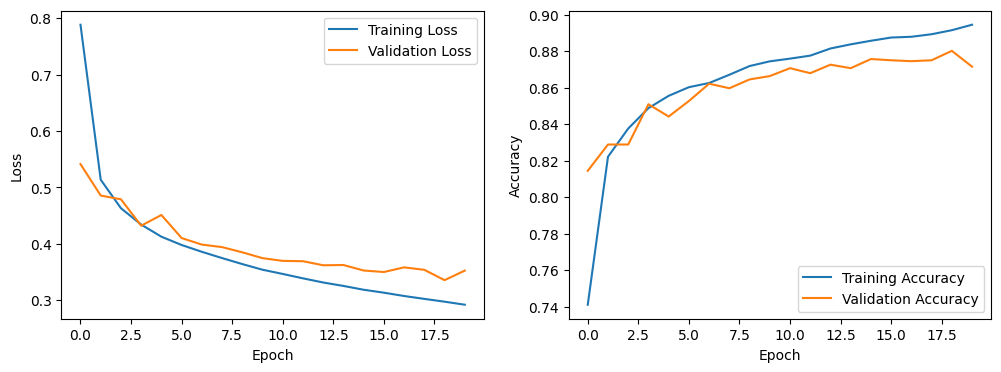

In [6]:
# Step 4: Performance Evaluation

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Visualize the training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Overall, the model demonstrated effective performance in classifying fashion items, with visualizations indicating good training and validation metrics.